# Regression to Predict Boston Housing Prices


Disclaimer: A large portion of this project is based on tutorials by Dr Jason Brownlee, and I take no credit for discoveries or work produced by him.

We will be using a number of different fields from the Boston House Price dataset residing in the UCI repository. The fields are defined as follows:

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per USD10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk 􀀀 0:63)2 where Bk is the proportion of blacks by town

LSTAT: portion oflower status of the population

MEDV: Median value of owner-occupied homes in USD1000s



Note that the inputs are of different units of measurements.


### Models used:

1. Linear Regression: A simple method to linear model the relationship between an output variable and one more explanatory variables.

2. Lasso Regression: Like Linear Regression but performs regularisation. (For difference between Ridge and Lasso, refer [here.](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/). In esssence, Ridge will either drop all or none of the features. Lasso will shrink to zero those coefficients which truly do not contribute, thus performing feature selection.)

3. Elastic Net: Uses regularisation techniques of both Lasso and Ridge regression.

4. Regression Trees: Just like a classification decision tree. For classification trees, attribute selected to split the dataset is the  attribute which results more pure leaf. But for continous variables, then the attribute is selected based on which ever results in a regression that has the lowest SSE.

5. KNN: Refer here for [explanation.](https://github.com/rianashwin/01_IRIS_V1/blob/master/03_REPORTS/draft_2.ipynb)

6. Support Vector Regression: Support Vector Machines for continous variables. Question here is what's the difference between SVR and Linear LSE Regression. Linear Regression fits a line which minimises the Squared Errors (ie LSE). SVR on the other hand allows some acceptable margin of error ie epsilon. Thus the points which go into the cost function and thus impact the hyperplane (akin to the line) are points which exceed epsilon. Refer [here](https://cs.adelaide.edu.au/~chhshen/teaching/ML_SVR.pdf) and [here](http://www.alivelearn.net/?p=1490) for explanation.

### We will also be looking at utilising ensemble methods to further improve accuracy of predictions.

Ensemble methods essentially combine multiple machine learning models to arrive and improved accuracy. 

Common methods include:

1. Bagging: Population of data is split into multiple smaller datasets, and each smaller population are used to train similar algorithms. Predictions are then combined either by averaging or using majority voting. Aim is to reduce variance.

2. Boosting: An iterative process where multiple learners are trained on the dataset. However, for each subsequent interation, previously misclassified observations are given higher weights such that subsequent learners improve on previous model's erros. Aim is to reduce bias.

3. Stacking: A learner is used to combine outputs from other learners.

You can use duplicate models in an ensemble model but best practice is to use different models as the goal of using ensemble methods is to overcome inherent weaknesses within models.

Typically, we assigne identical weights to each model within an ensemble model but winning Kagglers have used algorithms to determine optimal weight assignments for models.

Refer [here](https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/) for a good answer for Stats StackExchange on the differences between Bagging, Boosting and Stacking.

Refer [here](https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/) for a good intro to Ensemble Methods from AnalyticsVidhya, and [here](https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/) for an interesting article from AnalyticsVidhya on most common questions about Ensemble Methods.

# Step 1: Load Libraries and Dataset

In [1]:
#load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#load dataset (source: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data)
filename = r'D:\PROJECTS\GITHUB\02_BOSTON\01_DATA\housing.data.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = pandas.read_csv(filename, delim_whitespace=True, names=names)

# Step 2: Analyse Dataset

In [3]:
# shape
print(dataset.shape)

(506, 14)


In [4]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
# head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

Note that scales of each attribute are different.

In [6]:
# descriptions
pandas.set_option('precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


Distribution indicates min, max and means for each attribute differ greatly, and we may need to consider performing normalisation.

In [7]:
# correlation, where <-0.7 or >0.7 indicates strong correlation
pandas.set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

# Step 3: Visualise Data

### Unimodal Data Visualisations ie individual attributes

<IPython.core.display.Javascript object>


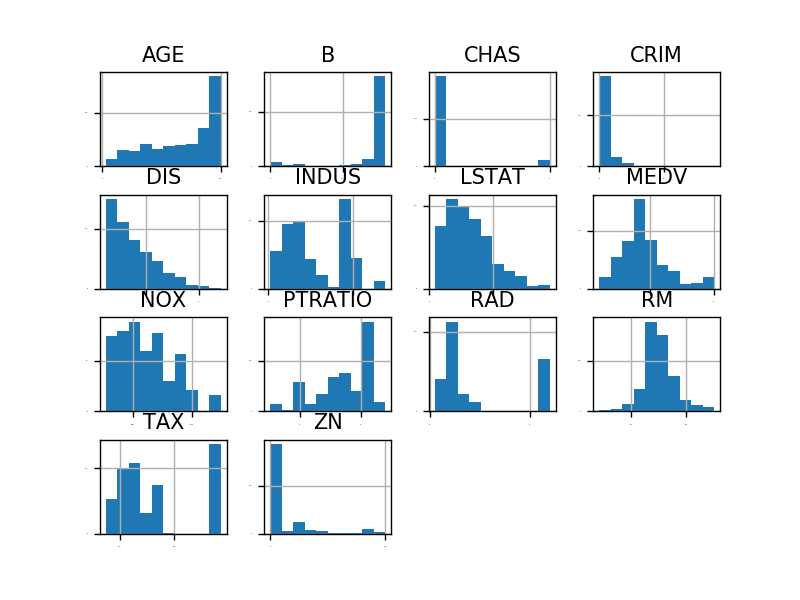

In [8]:
# histograms
%matplotlib notebook
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()
#CRIM, ZN, AGE and B have an exponential distribution. 
#RAD and TAX have a bimodal distribution.

<IPython.core.display.Javascript object>


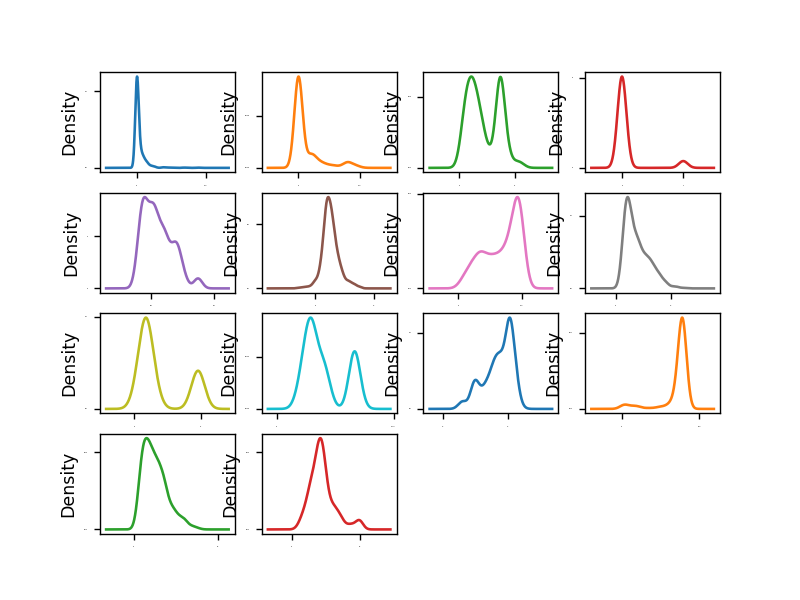

In [9]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,fontsize=1)
plt.show()

<IPython.core.display.Javascript object>


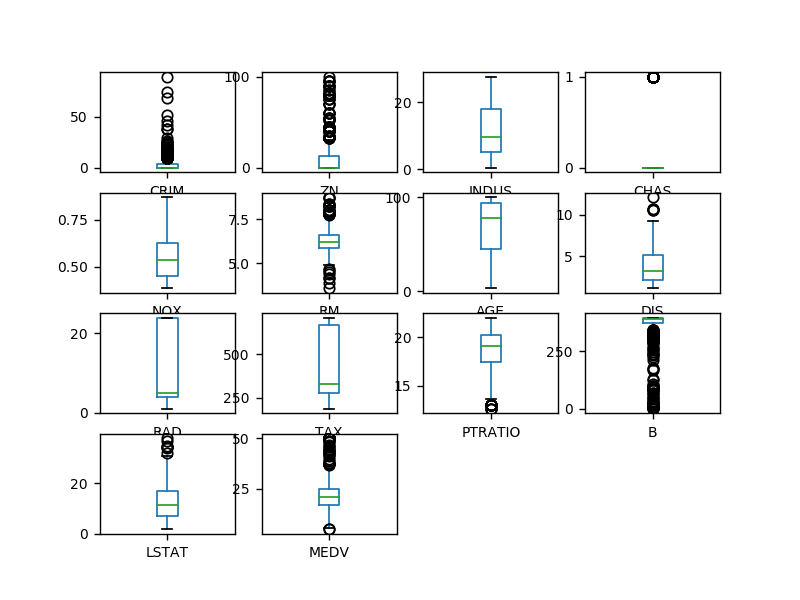

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
plt.show()
# indicates potential outliers

### Multimodal Data Visualisations ie between attributes

<IPython.core.display.Javascript object>


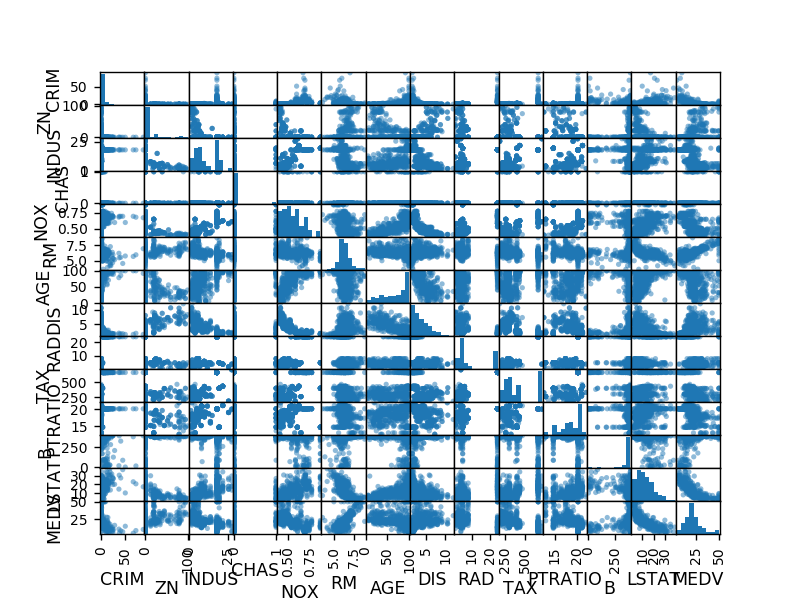

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()
#shows that for strongly correlated attributes, there appears to be good structure, even though not necessarily linear
#indicates possible predictive relationships

<IPython.core.display.Javascript object>


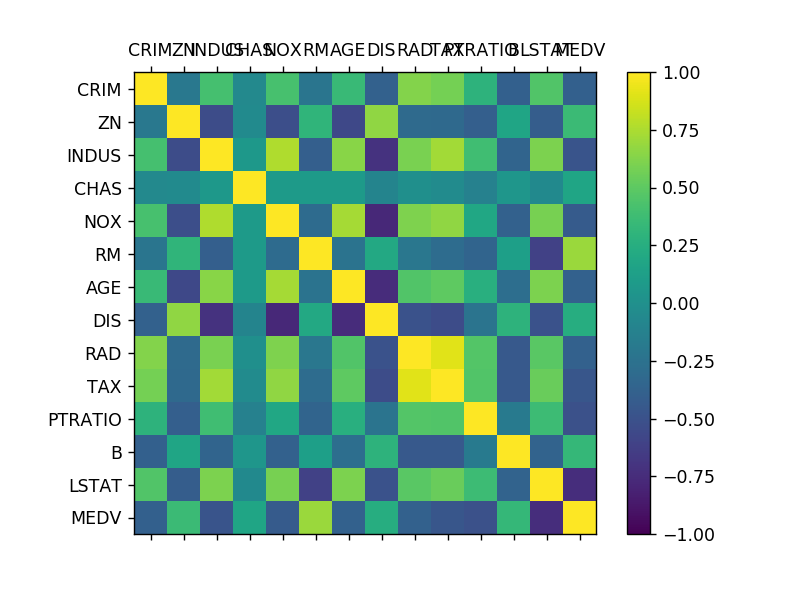

In [12]:
#correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
#The bright yellow plots indicaten strong positive correlation whereas the dark blue areas show  strong negative
#correlation, which suggest candidates for removal to better improve accuracy of models later on to avoid the "double counting effect".

# Step 4: Validation Dataset

In [13]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

# Step 5: Evaluate Algorithms: Baseline

In [14]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'neg_mean_squared_error'

In [15]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [16]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=False, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,
        scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -28.908889 (14.989679)
SVR: -85.518342 (31.994798)


<IPython.core.display.Javascript object>


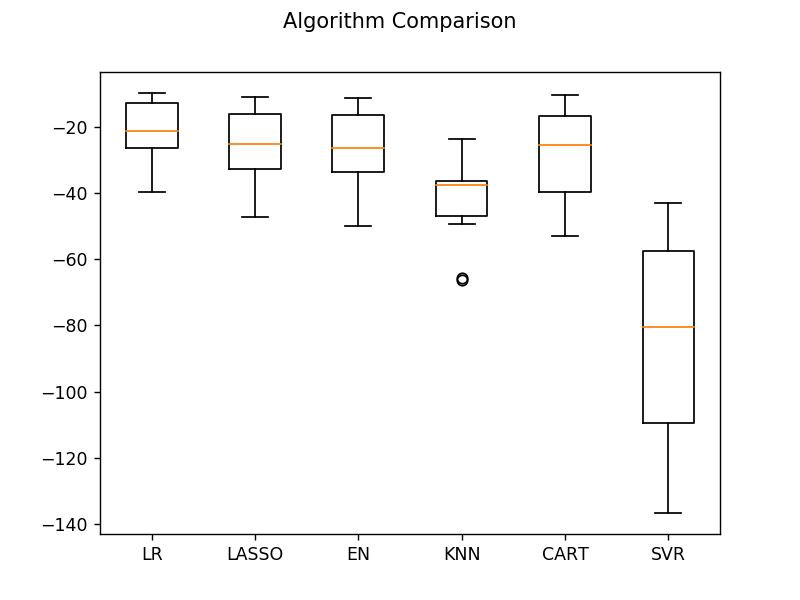

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Note differing scales are likely to impact the accuracy of the models. Consider standardising data.

# Step 6: Standardize Data

In [18]:
#Data is transformed such that each attribute has a mean value of
#zero and a standard deviation of 1.
#We also need to avoid data leakage when we transform the data. 
#A good way to avoid leakage is to use pipelines that standardize the data and build the
#model for each fold in the cross validation test harness. That way we can get a fair estimation
#of how each model with standardized data might perform on unseen data.

In [19]:
# Standardize the dataset
# Append name of model to pipeline, and also append the standardized model
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=False, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,
        scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
# Significant improvement in KNN and SVR

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -27.075465 (11.855461)
ScaledSVR: -29.633086 (17.009186)


<IPython.core.display.Javascript object>


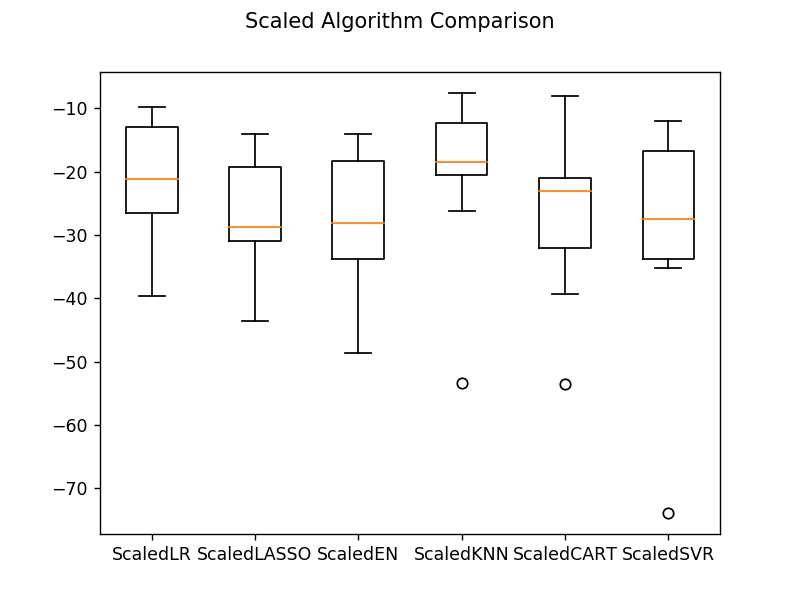

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# KNN now has lowest MSE and also tightest distribution, indicating good consistent performance

# Step 7: Parameter Tuning

In [21]:
#The default value for the number of neighbors in KNN is 7. 
#We can use a grid search to try a set of different numbers of neighbors and see if we
#can improve the score. The below example tries odd K values from 1 to 21, an arbitrary range
#covering a known good value of 7. Each K value (n neighbors) is evaluated using 10-fold cross
#validation on a standardized copy of the training dataset.

In [22]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle=False, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s \n" % (grid_result.best_score_, grid_result.best_params_))

for i in range(0, k_values.size):
    print("%f (%f) with: %r" % (grid_result.cv_results_['mean_test_score'][i], 
                                grid_result.cv_results_['std_test_score'][i],
                                grid_result.cv_results_['params'][i] ))

#from here, we see the best K is 3, and error is even lower now.

Best: -18.172137 using {'n_neighbors': 3} 

-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


# Step 8: Ensemble Methods

#### We will utilise the four ensemble methods to further improve the performance of our models:

Boosting techniques improve weak learners by combining them iteratively and making each subsequent model learn from the prior model. It helps to reduce underfitting.

The first Boosting technique we will use is AdaBoost. At each iteration, the weights for misclassified instances are increased such that each subsequent models pays more attention to the errors made previously. Explanation [here](https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/) from Dr Jason Brownlee.

Another boosting technique is Gradient Boosting. While AdaBoost modifies the sample distribution by changing the weights of instances (increase weights of mis-classified instances, and reducing weights correctly  classified instances), gradient boosting does not change weights. Instead, subsequent models are trained on the remaining errors from the strong learner. Models are added in order to reduce the error of the strong learner. Explanation [here](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) from Dr Jason Brownlee.

Refer [here](https://www.quora.com/What-is-the-difference-between-gradient-boosting-and-adaboost/answer/R%C3%A9mi-Mo%C3%AFse?srid=uy6mJ) for a great explanation on the differences between AdaBoost and Gradient Boosting.

Bagging techniques are a way of splitting the population dataset into many smaller resampling sets, training learners on these smaller sets, and averaging the scores. Note that weights can be applied to arrive at a weighted average. Kagglers have algorithms that help determine best weights.  

The first bagging technique used is Random Forests, which essentially uses multiple weak decision trees, but each decision trees only look at a random subset of features when decising optimal splits. (Remember that decisions trees evaluate all features and decide which is best split. RF will only look at certain random features, thus ensuring each decision tree is structurally different. Note that in RF, there is no pruning, thus  each decision tree will have high variance)
Explanation [here](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/) from Dr Jason Brownlee, and another intuitive explanation [here](http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics) from Dr. Arshavir Blackwell. 

In CART, when selecting a split point, the learning algorithm is allowed to look through all variables and all variable values in order to select the most optimal split-point. The random forest algorithm changes this procedure so that the learning algorithm is limited to a random sample of features of which to search

The second bagging technique used is Extra Trees (aka Extremely Randomised Trees). While RF decide on a the best split (albeit within random subsets of features), ERT will assign random split points. Common perception is that this randomisation of split points helps reduce variance, leading to better generalisation of the model.




In [23]:
#AdaBoostRegressor fits a regressor but at each iteration weights are boosted towards misclassified examples
#GBM is a regression tree ensemble model where at each iteration, the model is trained on the remaining errors.
#RF Regressor and ET are as per the explanation above.
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold =  KFold(n_splits=num_folds, shuffle=False, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,
    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


#we can see that Scaled GBM has superior performance

ScaledAB: -14.663812 (6.237350)
ScaledGBM: -10.319231 (4.658552)
ScaledRF: -12.813926 (6.628845)
ScaledET: -10.413798 (5.622693)


<IPython.core.display.Javascript object>


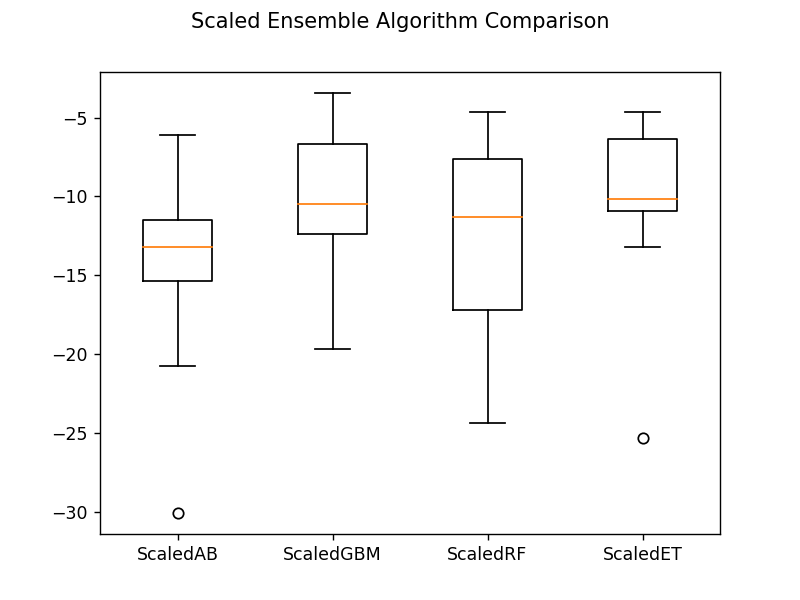

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
#From the above we see that not only does Scaled GBM have a higher mean, it's median is highest too
#although it's spread of scores is not as tight

# Step 9: Tune Ensemble Methods

We can tune the number of boosting stages. Typically, the higher the number of boosting stages, the better the performance, but this leads to longer training time.

In [26]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators=numpy.array([50,100,150,200,250,300,350,400])
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=False, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [27]:
print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
for i in range(0, n_estimators.size):
    print("%f (%f) with: %r" % (grid_result.cv_results_['mean_test_score'][i], 
                                grid_result.cv_results_['std_test_score'][i],
                                grid_result.cv_results_['params'][i] ))

Best: -9.356471 using {'n_estimators': 400}

-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


So the best tuning was with 400 boosting stages.

# Step 10: Finalise the Model

Now that we have decided on the best tuned ensemble method, let's reprepare the data and fit the model. Once we have standardized the training dataset, use the same scalers to standardise the validation set and generate predictions.

In [29]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


11.8752520792


The error on the validation dataset is close to what we achieved on the training dataset.